# Theory 
ARIMA with Python and Data Visualization Theory
ARIMA (Autoregressive Integrated Moving Average) models are a popular technique for time series forecasting in Python. Here's a breakdown of the theory and how it integrates with data visualization:

ARIMA Model Components:

AR (Autoregressive): This term captures the impact of past values of the time series on its future values.
I (Integrated): Differencing is applied to make the data stationary (constant mean and variance). The order of differencing is denoted by "d".
MA (Moving Average): This term considers the influence of past forecast errors on future predictions.
ARIMA Notation:

We express ARIMA models as ARIMA(p, d, q), where:

p: The number of autoregressive (AR) terms.
d: The degree of differencing needed to achieve stationarity.
q: The number of moving average (MA) terms.

# Data Loading
 



We will  load our stock price dataset with the “Date” column as index. 

In [1]:
import pandas as pd


net_df = pd.read_csv(r"E:\mahesh refrence\Sem 6\VIVA\DAV\Datasets\NFLX.csv", index_col="Date", parse_dates=True)
net_df.head(3)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400


# Data Visualization 
 



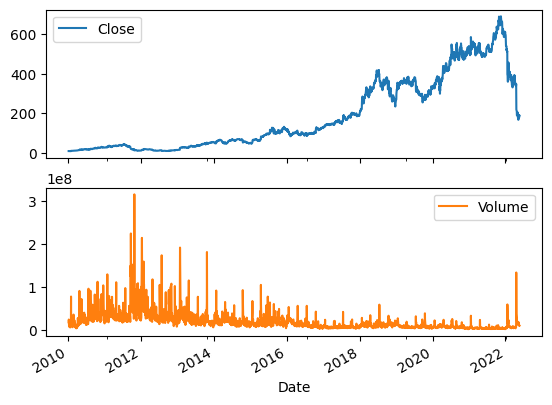

In [2]:
net_df[["Close","Volume"]].plot(subplots=True, layout=(2,1));

# Rolling Forecast ARIMA Model


In [3]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


train_data, test_data = net_df[0:int(len(net_df)*0.9)], net_df[int(len(net_df)*0.9):]


train_arima = train_data['Open']
test_arima = test_data['Open']


history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])


In [4]:
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

# Model Evaluation 


In [5]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 170.15854324956945
MAE: 8.012871071851325
RMSE: 13.044483249618187


Let's visualize and compare the actual results to the predicted ones .
It's clear that our model has made highly accurate predictions.

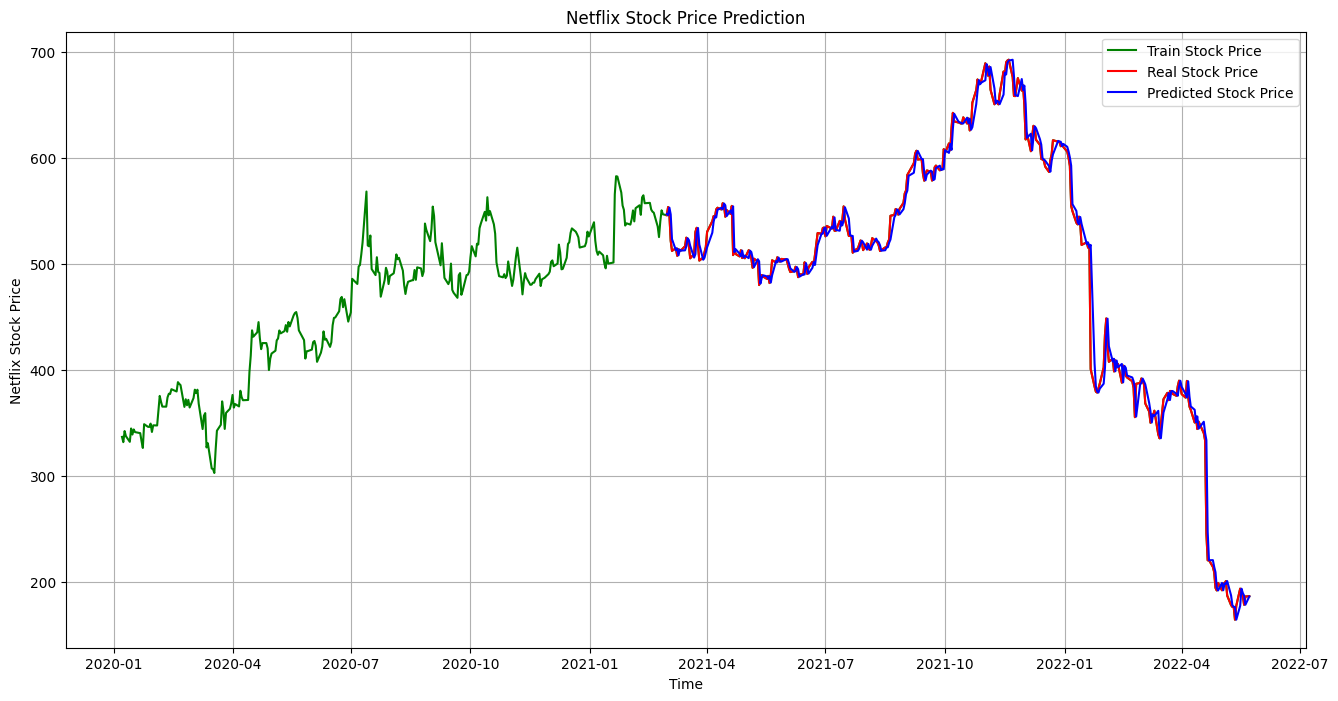

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(net_df.index[-600:], net_df['Open'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.grid(True)
plt.savefig('arima_model.pdf')
plt.show()